In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Preprocessing
import scipy.stats as stats
from sklearn import feature_selection
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

#Tuning
from sklearn.model_selection import RandomizedSearchCV
from warnings import simplefilter

#Modelling stage algorithms
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#Modelling stage others
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Loading the dataset
bike = pd.read_csv("C:/Users/fetih.kaya/Desktop/hour_v4.csv")

***

# 1 - EXPLANATORY DATA ANALYSIS

***

### 1.1 - General Information About the Dataset

##### 1.1.a - General information

In [4]:
#General information about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant            17379 non-null int64
date               17379 non-null object
season             17379 non-null object
year               17379 non-null int64
month              17379 non-null object
hour               17379 non-null int64
holiday            17379 non-null object
weekday            17379 non-null object
workingday         17379 non-null object
weather            17379 non-null object
temp               17379 non-null float64
apparent_temp      17379 non-null float64
humidity           17379 non-null object
windspeed          17379 non-null float64
casual_user        17379 non-null int64
registered_user    17379 non-null int64
total_user         17379 non-null int64
dtypes: float64(3), int64(6), object(8)
memory usage: 2.3+ MB


***
***
<span style='background :yellow' > - There are 17.379 entries in the dataset
    
<span style='background :yellow' > - The dataset has 17 attributes which 9 of them are numerical and 8 categorical
    
<span style='background :yellow' > - There are no null values in the entries
    
***
***

##### 1.1.b - First five rows of the dataset

In [5]:
#Example rows of the dataset
bike.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,total_user
0,1,1/1/2011,Winter,2011,January,0,No,Saturday,No,"Clear, Partly cloudy",3.3,3.0,81%,0.0,3,13,16
1,2,1/1/2011,Winter,2011,January,1,No,Saturday,No,"Clear, Partly cloudy",2.3,2.0,80%,0.0,8,32,40
2,3,1/1/2011,Winter,2011,January,2,No,Saturday,No,"Clear, Partly cloudy",2.3,2.0,80%,0.0,5,27,32
3,4,1/1/2011,Winter,2011,January,3,No,Saturday,No,"Clear, Partly cloudy",3.3,3.0,75%,0.0,3,10,13
4,5,1/1/2011,Winter,2011,January,4,No,Saturday,No,"Clear, Partly cloudy",3.3,3.0,75%,0.0,0,1,1


##### 1.1.c - Description of column labels

***
***
- **instant:** bike rental records' index
- **date:** date of bike rental record
- **season:** season of bike rental record
- **year:** year of bike rental record
- **month:** month of bike rental record
- **hour:** hour of bike rental record
- **holiday**: is the day a holiday or not
- **weekday:** the day of bike rental record
- **workingday:** is the day a working day or not
- **weather:** weather condition of the day of bike rental record
- **temp:** weather temperature of the day of bike rental record
- **apparent_temp:** apparent temperature of the weather of bike rental record
- **humidity:** humidity of the weather of bike rental record
- **windspeed:** windspeed of the weather of bike rental record
- **casual_user:**  number of casual users bike rental record
- **registered_user:** number of registered users bike rental record
- **total_user:** number of total bike rental record
***
***

***

### 1.2 - Data Cleaning

##### 1.2.a - Change the "date" and "humidity"  attributes' datatype

<span style='background :yellow' >- The datatype of "date" and "humidity" attributes are given as object though they refer to numerical information. So that, their datatypes will be changed to numeric and "date" column will be seperated to refer only day. Because month and year information are given in other columns seperated but day number not given.

In [6]:
#For "date" column: drop month and year and also change datatype from object to integer 
bike['date'] = bike['date'].astype(str).apply(lambda x: x.split('/')[1])
bike['date'] = bike['date'].astype(int)

In [7]:
#Changing datatype of "humidity" column from object to float and remove % sign
bike['humidity'] = bike['humidity'].astype(str).apply(lambda x: x.replace('%',''))
bike['humidity'] = bike['humidity'].astype(float)

***

### 1.3 -  Data Visualizations

##### 1.3.a - Effect of "season" on number of bike rental 

   Season  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0  Winter                         14.3                             96.8
1  Summer                         50.3                            185.7
2  Spring                         46.2                            162.2
3    Fall                         30.7                            168.2


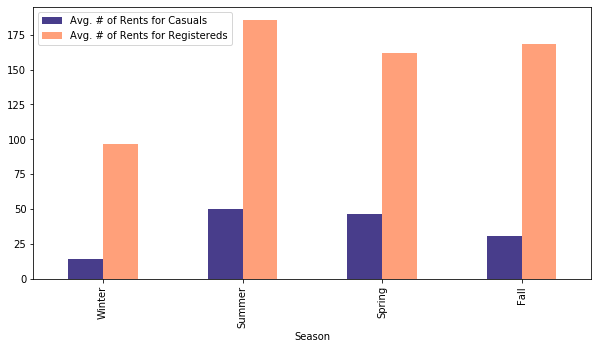

In [8]:
#Average number of bike rentals in accordance with seasons
season_effect = bike.groupby(by='season', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
season_effect.columns = ['Season', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
season_effect = season_effect.sort_values(['Season'], ascending=False)
season_effect = season_effect.reset_index(drop=True)

ax = season_effect.plot(x="Season", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(10,5), color=["darkslateblue","lightsalmon"])

print(round(season_effect,1))

***
***
<span style='background :yellow' >It is seen that;

<span style='background :yellow' >- Registered users renting number does not change much over the period of summer, spring and fall, but it drops in winters.

<span style='background :yellow' >- On the other hand, casual users nearly same pattern with registered users with really less amounts. The number of rentals of casual users makes peak at summer and decrease gradually over spring, fall and winter.
***
***

##### 1.3.b - Effect of "month" on number of bike rental 

        Month  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0     January                          8.4                             86.0
1    February                         11.2                            101.7
2       March                         30.2                            125.2
3       April                         42.3                            144.9
4         May                         50.6                            172.3
5        June                         51.3                            189.2
6        July                         52.5                            179.3
7      August                         48.8                            189.3
8   September                         48.9                            191.8
9     October                         41.2                            181.0
10   November                         25.5                            151.9
11   December                         14.6                            127.7


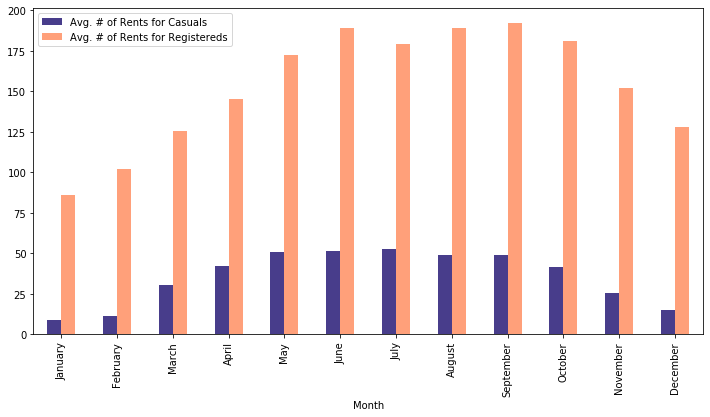

In [9]:
#Average number of bike rentals in accordance with month
month_effect = bike.groupby(by='month', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
month_effect.columns = ['Month', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
index = pd.DataFrame([4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9], columns=["idx"])
month_effect = pd.concat([index, month_effect], axis=1)

month_effect = month_effect.sort_values(['idx'], ascending=True)
month_effect = month_effect.reset_index(drop=True)

month_effect = month_effect.drop(['idx'], axis=1) 

ax = month_effect.plot(x="Month", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(12,6), color=["darkslateblue","lightsalmon"])

print(round(month_effect,1))

***
***
<span style='background :yellow' >It is seen again;

<span style='background :yellow' >- Both registered and casual users renting number peak on summers and fall gradually through winters.

***
***

##### 1.3.c - Effect of "hour" on number of bike rental 

    Hour  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0      0                         10.2                             43.7
1      1                          6.5                             26.9
2      2                          4.8                             18.1
3      3                          2.7                              9.0
4      4                          1.3                              5.1
5      5                          1.4                             18.5
6      6                          4.2                             71.9
7      7                         11.1                            201.0
8      8                         21.7                            337.3
9      9                         30.9                            188.4
10    10                         46.5                            127.2
11    11                         59.5                            148.6
12    12                         68.3                            185.0
13    

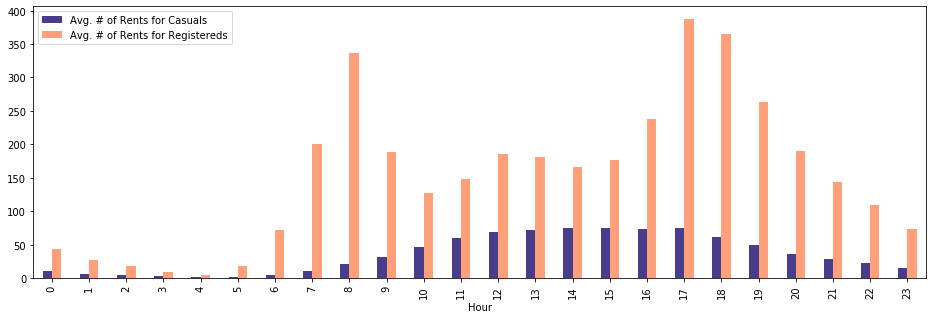

In [10]:
#Average number of bike rentals in accordance with hour
hour_effect = bike.groupby(by='hour', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
hour_effect.columns = ['Hour', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
hour_effect = hour_effect.sort_values(['Hour'], ascending=True)
hour_effect = hour_effect.reset_index(drop=True)

ax = hour_effect.plot(x="Hour", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(16,5), color=["darkslateblue","lightsalmon"])

print(round(hour_effect,1))

***
***
<span style='background :yellow' >The graph shows that;

<span style='background :yellow' >- During the nights very few rentings take place especially from midnight to 5 am.
    
<span style='background :yellow' >- The registered users' rentings make peak on rush hours and average other hours of the day.
    
<span style='background :yellow' >- However, casual users' rentings make peak on noon hours. This means, casual users are usually not working people.

***
***

##### 1.3.d - Effect of "holiday" on number of bike rental 

  Holiday  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0     Yes                         44.7                            112.2
1      No                         35.4                            155.0


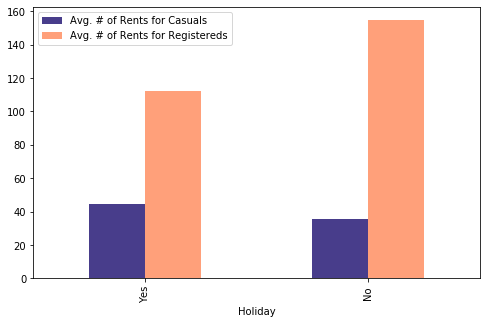

In [11]:
#Average number of bike rentals in accordance with holiday
holiday_effect = bike.groupby(by='holiday', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
holiday_effect.columns = ['Holiday', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
holiday_effect = holiday_effect.sort_values(['Holiday'], ascending=False)
holiday_effect = holiday_effect.reset_index(drop=True)

ax = holiday_effect.plot(x="Holiday", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(8,5), color=["darkslateblue","lightsalmon"])

print(round(holiday_effect,1))

***
***
<span style='background :yellow' >The graph shows that;

<span style='background :yellow' >- Casual users' rentings do not be affected as much as registered users' from holidays. This means, usually working people use these bikes as registered because on holidays the usage number decreases meaningly. 
    
***
***

##### 1.3.e - Effect of "weekday" on number of bike rental 

         Day  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0     Monday                         28.6                            155.2
1    Tuesday                         23.6                            167.7
2  Wednesday                         23.2                            168.0
3   Thursday                         24.9                            171.6
4     Friday                         31.5                            164.7
5   Saturday                         61.2                            129.0
6     Sunday                         56.2                            121.3


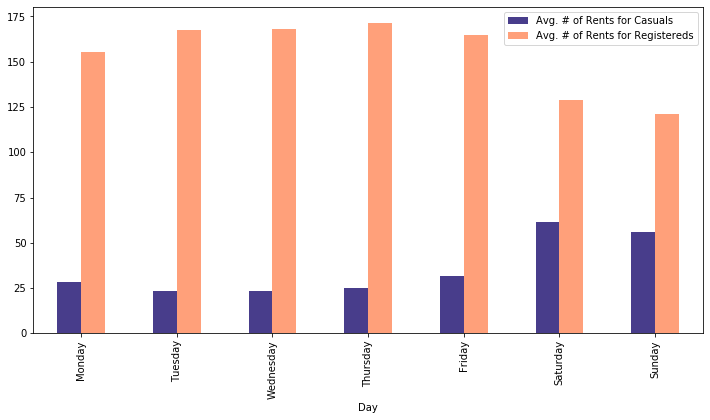

In [12]:
#Average number of bike rentals in accordance with week days
weekday_effect = bike.groupby(by='weekday', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
weekday_effect.columns = ['Day', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']

index = pd.DataFrame([5, 1, 6, 7, 4, 2, 3], columns=["idx"])
weekday_effect = pd.concat([index, weekday_effect], axis=1)

weekday_effect = weekday_effect.sort_values(['idx'], ascending=True)
weekday_effect = weekday_effect.reset_index(drop=True)

weekday_effect = weekday_effect.drop(['idx'], axis=1)

ax = weekday_effect.plot(x="Day", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(12,6), color=["darkslateblue","lightsalmon"])

print(round(weekday_effect,1))

***
***
<span style='background :yellow' >The graph shows that;

<span style='background :yellow' >- Casual users' rentings peak on weekends while registered users' rentings drop on weekends. This means again, registered users are working people and casual users not.
    
***
***

##### 1.3.f - Effect of "workingday" on number of bike rental 

  Workingday  Avg. # of Rents for Casuals  Avg. # of Rents for Registereds
0        Yes                         25.6                            167.6
1         No                         57.4                            124.0


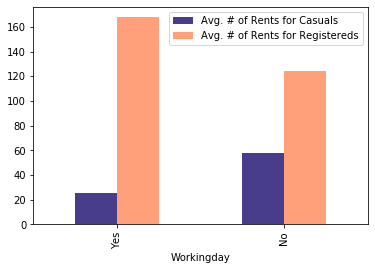

In [13]:
#Average number of bike rentals in accordance with working days
workingday_effect = bike.groupby(by='workingday', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
workingday_effect.columns = ['Workingday', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
workingday_effect = workingday_effect.sort_values(['Workingday'], ascending=False)
workingday_effect = workingday_effect.reset_index(drop=True)

ax = workingday_effect.plot(x="Workingday", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(6,4), color=["darkslateblue","lightsalmon"])

print(round(workingday_effect,1))

##### 1.3.g - Effect of "weather" on number of bike rental 

                         Weather  Avg. # of Rents for Casuals  \
0                   Mist, Cloudy                         29.6   
1         Light rain, Light snow                         16.1   
2  Heavy rain, Snow, Thundestorm                          2.7   
3           Clear, Partly cloudy                         40.5   

   Avg. # of Rents for Registereds  
0                            145.6  
1                             95.5  
2                             71.7  
3                            164.3  


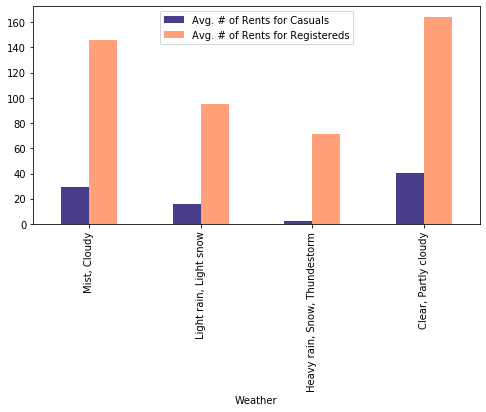

In [14]:
#Average number of bike rentals in accordance with working days
weather_effect = bike.groupby(by='weather', as_index=False).agg({'casual_user': 'mean', 'registered_user':'mean'})
weather_effect.columns = ['Weather', 'Avg. # of Rents for Casuals', 
                         'Avg. # of Rents for Registereds']
weather_effect = weather_effect.sort_values(['Weather'], ascending=False)
weather_effect = weather_effect.reset_index(drop=True)

ax = weather_effect.plot(x="Weather", y=["Avg. # of Rents for Casuals",
                                       "Avg. # of Rents for Registereds"], kind="bar",
                                        figsize=(8,4), color=["darkslateblue","lightsalmon"])

print(round(weather_effect,1))

##### 1.3.h - Effect of "temp" and "apparent_temp" on number of bike rental 

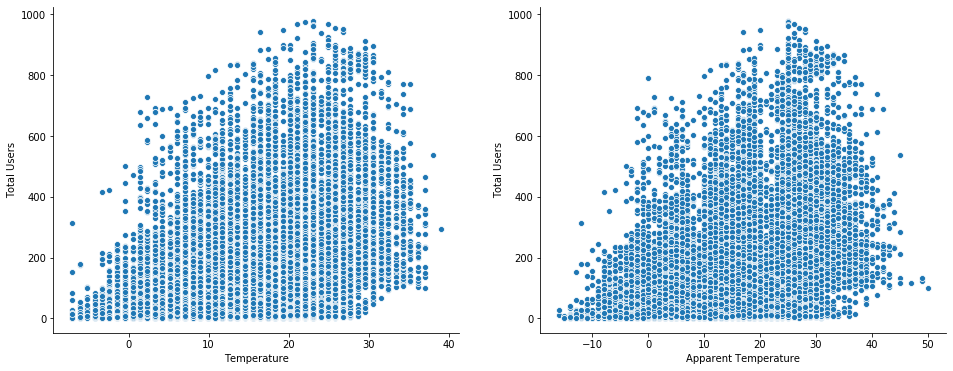

In [15]:
#Distribution of bike rentals according to temperature and apparent temperature
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16, 6)        

sns.scatterplot(y="total_user", x="temp", data= bike, legend=False, ax = ax[0])
ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("Total Users")
      
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


sns.scatterplot(y="total_user", x="apparent_temp", data= bike, legend=False, ax = ax[1])
ax[1].set_xlabel("Apparent Temperature")
ax[1].set_ylabel("Total Users")
      
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

***
***
<span style='background :yellow' >The graphs show that;

<span style='background :yellow' >- The most preferred weather temperature is between 20 - 30 degrees, while the most preferred apparent temperature is around 30 degrees. 
    
<span style='background :yellow' >- Distribution of rentals in accordance with temperature makes a funnel shape.
    
<span style='background :yellow' >- Average temperatures are preferred mostly by people for renting, neither low nor high temperatures preferred.
    
***
***

##### 1.3.i - Effect of "humidity" on number of bike rental 

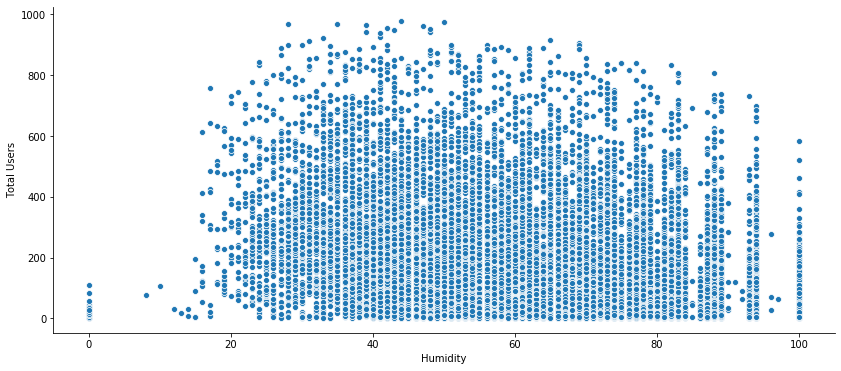

In [16]:
#Distribution of bike rentals according to humidity
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)        

sns.scatterplot(y="total_user", x="humidity", data= bike, legend=False)
plt.xlabel("Humidity")
plt.ylabel("Total Users")
      
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

***
***
<span style='background :yellow' >- It seems that; humidity does not have a significant effect on rentals, but high humidity levels decreases a little bit the number of rentals.
    
***
***

##### 1.3.j - Effect of "windspeed" on number of bike rental 

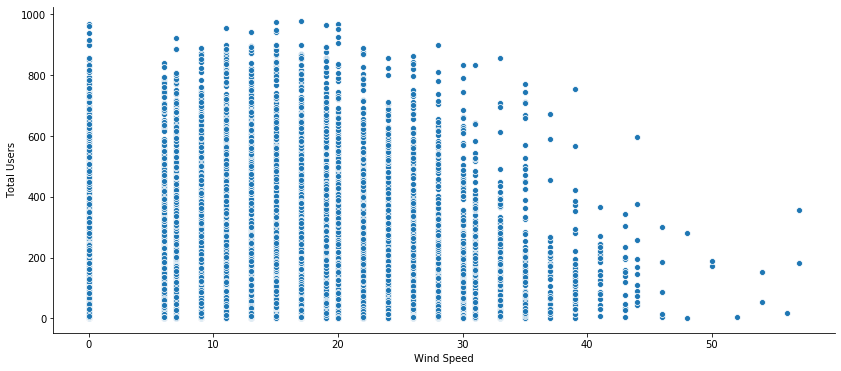

In [17]:
#Distribution of bike rentals according to wind speed
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)        

sns.scatterplot(y="total_user", x="windspeed", data= bike, legend=False)
plt.xlabel("Wind Speed")
plt.ylabel("Total Users")
      
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

***
***
<span style='background :yellow' >- It seems that; wind speed does not have a significant effect on rentals, but high wind speeds, over than 40, decreases the number of rentals.
    
***
***

***

# 2 - DATA PREPROCESSING

***

### 2.1 - Data Cleaning

##### 2.1.a - Removing duplicated entries

In [18]:
print(bike.duplicated().value_counts())

bike = bike.drop_duplicates()

False    17379
dtype: int64


***
***
<span style='background :yellow' >- There is no duplicated entries in the dataset.
    
***    
***

##### 2.1.b - Missing data handling

In [19]:
#Missing value search
number_of_missing_data = (bike.isnull().sum()).sort_values(ascending=False)
number_of_missing_data = pd.DataFrame(number_of_missing_data, columns=['# of missing values'])                                                                    
percentage_of_missing_data = (bike.isnull().sum()/bike.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_data = pd.DataFrame(percentage_of_missing_data, columns=['% of missing part'])
missing = pd.concat([number_of_missing_data,percentage_of_missing_data], axis=1) 

missing

,# of missing values,% of missing part
total_user,0,0.0
weekday,0,0.0
date,0,0.0
season,0,0.0
year,0,0.0
month,0,0.0
hour,0,0.0
holiday,0,0.0
workingday,0,0.0
registered_user,0,0.0


***
***
<span style='background :yellow' >- There is no missing entries in the dataset.
    
***    
***

##### 2.1.c - Removing outliers

In [20]:
#For 'temp' attribute

Q1 = bike.temp.quantile(q=0.25)
Q3 = bike.temp.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
bike = bike[(bike['temp'] > minimum) & (bike['temp'] < maximum)]


#For 'apparent_temp' attribute

Q1 = bike.apparent_temp.quantile(q=0.25)
Q3 = bike.apparent_temp.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
bike = bike[(bike['apparent_temp'] > minimum) & (bike['apparent_temp'] < maximum)]


#For 'humidity' attribute

Q1 = bike.humidity.quantile(q=0.25)
Q3 = bike.humidity.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
bike = bike[(bike['humidity'] > minimum) & (bike['humidity'] < maximum)]


#For 'windspeed' attribute

Q1 = bike.windspeed.quantile(q=0.25)
Q3 = bike.windspeed.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
bike = bike[(bike['windspeed'] > minimum) & (bike['windspeed'] < maximum)]


#For 'total_user' attribute

Q1 = bike.total_user.quantile(q=0.25)
Q3 = bike.total_user.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
bike = bike[(bike['total_user'] > minimum) & (bike['total_user'] < maximum)]


bike = bike.reset_index(drop=True)

***
***
<span style='background :yellow' >- After removing the outliers from the dataset; there are 16.533 rows instead of 17.379 remainig.
    
***    
***

### 2.2 - Data Reduction

##### 2.2.a - Removing redundant columns

<span style='background :yellow' >- The "instant" column carry no information for modelling. It just shows the number of instances of rentals and it is unnecessary for modelling.

In [21]:
bike = bike.drop(['instant'], axis=1)

### 2.3 - Data Discretization

##### 2.3.a - Discretization of "temp" attribute

count    16533.000000
mean        15.217480
std          9.057601
min         -7.100000
25%          8.000000
50%         15.500000
75%         22.100000
max         39.000000
Name: temp, dtype: float64


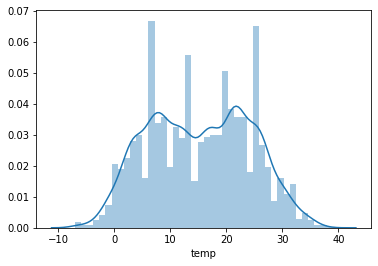

In [22]:
print(bike.temp.describe())

sns.distplot(bike.temp)

<span style='background :yellow' >- Discretization was applied according to histogram graph by dividing parts

In [23]:
#Apply discretization
mean = bike.temp.mean()
std = np.std(bike.temp)
minimum = bike.temp.min()
maximum = bike.temp.max()

temp = bike.temp
bike = bike.drop(['temp'], axis=1)

for i in range(bike.shape[0]):
    if minimum <= temp[i] < (mean - std):
        temp[i] = 'very cold weather'
        continue
    if (mean - std) <= temp[i] < mean:
        temp[i] = 'cold weather'
        continue
    if mean <= temp[i] < (mean + std):
        temp[i] = 'normal weather'
        continue
    if (mean + std) <= temp[i] <= maximum:
        temp[i] = 'hot weather'
        continue
          
bike = pd.concat([bike,temp], axis=1)

bike['temp'] = bike['temp'].astype(str)


##### 2.3.b - Discretization of "apparent_temp" attribute

count    16533.000000
mean        15.255429
std         11.326758
min        -16.000000
25%          6.000000
50%         16.000000
75%         25.000000
max         50.000000
Name: apparent_temp, dtype: float64


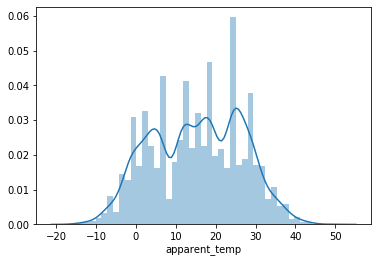

In [24]:
print(bike.apparent_temp.describe())

sns.distplot(bike.apparent_temp)

In [25]:
#Apply discretization
mean = bike.apparent_temp.mean()
std = np.std(bike.apparent_temp)
minimum = bike.apparent_temp.min()
maximum = bike.apparent_temp.max()
percent25 = 6
percent50 = 16
percent75 = 25

apparent_temp = bike.apparent_temp
bike = bike.drop(['apparent_temp'], axis=1)

for i in range(bike.shape[0]):
    if minimum <= apparent_temp[i] < (percent25 - std):
        apparent_temp[i] = 'very cold weather'
        continue
    if (percent25 - std) <= apparent_temp[i] < 10:
        apparent_temp[i] = 'cold weather'
        continue
    if 10 <= apparent_temp[i] < 20:
        apparent_temp[i] = 'normal weather'
        continue
    if 20 <= apparent_temp[i] < 30:
        apparent_temp[i] = 'hot weather'
        continue
    if 30 <= apparent_temp[i] <= maximum:
        apparent_temp[i] = 'very hot weather'
        continue
          
bike = pd.concat([bike,apparent_temp], axis=1)

bike['apparent_temp'] = bike['apparent_temp'].astype(str)


##### 2.3.c - Discretization of "humidity" attribute

count    16533.000000
mean        63.410875
std         19.009707
min          8.000000
25%         49.000000
50%         64.000000
75%         79.000000
max        100.000000
Name: humidity, dtype: float64


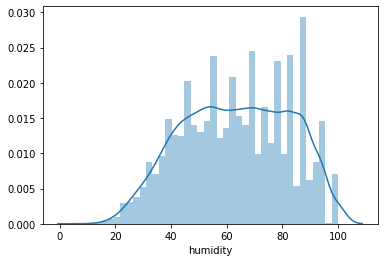

In [26]:
print(bike.humidity.describe())

sns.distplot(bike.humidity)

In [27]:
#Apply discretization
mean = bike.humidity.mean()
std = np.std(bike.humidity)
minimum = bike.humidity.min()
maximum = bike.humidity.max()

humidity = bike.humidity
bike = bike.drop(['humidity'], axis=1)

for i in range(bike.shape[0]):
    if minimum <= humidity[i] < 40:
        humidity[i] = 'low humidity'
        continue
    if 40 <= humidity[i] < 85:
        humidity[i] = 'normal humidity'
        continue
    if 85 <= humidity[i] < maximum:
        humidity[i] = 'high humidity'
        continue
              
bike = pd.concat([bike,humidity], axis=1)

bike['humidity'] = bike['humidity'].astype(str)

##### 2.3.d - Discretization of "windspeed" attribute

count    16533.000000
mean        12.217202
std          7.511178
min          0.000000
25%          7.000000
50%         11.000000
75%         17.000000
max         31.000000
Name: windspeed, dtype: float64


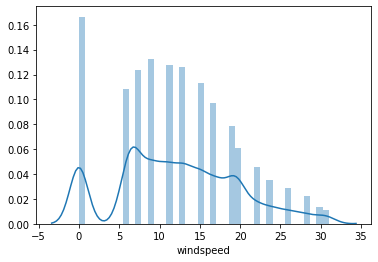

In [28]:
print(bike.windspeed.describe())

sns.distplot(bike.windspeed)

In [29]:
#Apply discretization
mean = bike.windspeed.mean()
std = np.std(bike.windspeed)
minimum = bike.windspeed.min()
maximum = bike.windspeed.max()
percent25 = 7
percent50 = 13
percent75 = 17

windspeed = bike.windspeed
bike = bike.drop(['windspeed'], axis=1)

for i in range(bike.shape[0]):
    if minimum <= windspeed[i] < percent25:
        windspeed[i] = 'low wind speed'
        continue
    if percent25 <= windspeed[i] < percent75:
        windspeed[i] = 'normal wind speed'
        continue
    if percent75 <= windspeed[i] < maximum:
        windspeed[i] = 'high wind speed'
        continue
              
bike = pd.concat([bike,windspeed], axis=1)

bike['windspeed'] = bike['windspeed'].astype(str)


### 2.4 - Feature Selection

##### 2.4.a - Chi2 correlation search for registered users

In [30]:
le = LabelEncoder()
X = bike.loc[:,'date':'windspeed']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(bike.loc[:,'registered_user'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,apparent_temp,1712.255762,3.220440e-108
1,month,1515.174723,3.431550e-81
2,weather,1354.097899,1.060698e-60
3,weekday,933.263606,3.198302e-17
4,season,887.461159,9.746644e-14
5,temp,871.179830,1.406386e-12
6,holiday,486.820385,9.996498e-01
7,workingday,379.428705,1.000000e+00
8,windspeed,231.805747,1.000000e+00
9,humidity,205.269537,1.000000e+00


##### 2.4.b - Chi2 correlation search for casual users

In [31]:
le = LabelEncoder()
X = bike.loc[:,'date':'windspeed']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(bike.loc[:,'casual_user'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,apparent_temp,2743.707792,0.000000e+00
1,month,1113.875465,1.186880e-95
2,weather,933.795059,1.065462e-67
3,temp,906.208717,1.325655e-63
4,workingday,744.066510,7.552632e-41
5,weekday,576.242633,1.593473e-20
6,holiday,477.796996,6.311055e-11
7,season,460.805156,1.653354e-09
8,humidity,186.535760,9.999998e-01
9,windspeed,128.481025,1.000000e+00


##### 2.4.c - Chi2 correlation search for total users

In [32]:
le = LabelEncoder()
X = bike.loc[:,'date':'windspeed']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(bike.loc[:,'total_user'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,apparent_temp,2024.131704,5.263264e-143
1,month,1857.221356,1.102398e-118
2,weather,1351.358347,7.287229e-53
3,temp,978.604810,1.587944e-16
4,weekday,912.290276,8.429078e-12
5,season,890.932884,1.996702e-10
6,holiday,581.550740,9.550468e-01
7,workingday,319.846663,1.000000e+00
8,windspeed,266.062844,1.000000e+00
9,humidity,216.555784,1.000000e+00


##### 2.4.d - Kendall-tau correlation search

In [33]:
bike_cat = bike.select_dtypes(include=object)

attributes = []
cor_values = []
p_values = []

for i in range(len(bike.columns)):
    attributes.append(bike.columns[i])
    cor_val, p_val = stats.kendalltau(bike.iloc[:,i], bike.loc[:,'total_user'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Kendall Tau Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Kendall Tau Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

,Attributes,Kendall Tau Corr.,P-Values
0,total_user,1.000000,0.000000e+00
1,registered_user,0.917647,0.000000e+00
2,casual_user,0.668889,0.000000e+00
3,hour,0.344086,0.000000e+00
4,apparent_temp,0.177194,7.956319e-203
5,temp,0.139168,3.845870e-126
6,year,0.135966,2.355981e-101
7,season,0.103985,1.063874e-71
8,humidity,0.072146,6.250527e-32
9,weather,0.063812,5.240025e-25


***
***
<span style='background :yellow' >-It seems; "date", "humidity" and "windspeed" attributes have no correlation with rental numbers of bikes because they have larger p-values than 5%. 
    
<span style='background :yellow' >-On the other hand, "holiday", "temp" and "workingday" attributes have large p-values for registered and total user targeted correlation search but not for casual user targeted one. So, they should not be removed from the beginning but can be removed if their removal increases the model performace.
    
***    
***

***

# 3 - DATA MODELLING 

***

### 3.1 - Removing Uncorrelated Attributes

<span style='background :yellow' >-Removing uncorrelated attributes with the target variable from the dataset, improves the model results. So, determined uncorrelated attributes removed from the dataset. 

In [34]:
bike = bike.drop(['date', 'humidity', 'windspeed'], axis=1)

### 3.2 - Preperation of the Attributes

<span style='background :yellow' >-Encoding the not continuous attributes with dummy variables. 

In [35]:
#Assign dummy variables to "season" attribute
dummy_name = pd.get_dummies(bike['season'])
bike = bike.drop(['season'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "year" attribute
dummy_name = pd.get_dummies(bike['year'])
bike = bike.drop(['year'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "month" attribute
dummy_name = pd.get_dummies(bike['month'])
bike = bike.drop(['month'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "holiday" attribute
dummy_name = pd.get_dummies(bike['holiday'])
bike = bike.drop(['holiday'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "weekday" attribute
dummy_name = pd.get_dummies(bike['weekday'])
bike = bike.drop(['weekday'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "workingday" attribute
dummy_name = pd.get_dummies(bike['workingday'])
bike = bike.drop(['workingday'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "weather" attribute
dummy_name = pd.get_dummies(bike['weather'])
bike = bike.drop(['weather'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "temp" attribute
dummy_name = pd.get_dummies(bike['temp'])
bike = bike.drop(['temp'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

#Assign dummy variables to "apparent_temp" attribute
dummy_name = pd.get_dummies(bike['apparent_temp'])
bike = bike.drop(['apparent_temp'], axis=1)
bike = pd.concat([bike,dummy_name], axis=1)

### 3.3 - Split Dependent Variables and Target Variable

<span style='background :yellow' >-Assigning "total_user" attribute as target variable.
    
<span style='background :yellow' >- Removing "registered_user" and "casual_user" attributes from the dependent variable set because their sum equals to target variable and model may cheat while predicting by using only these attributes.

In [36]:
bike_y = bike.loc[:,'total_user']
bike_x = bike.drop(['total_user', 'registered_user', 'casual_user'], axis=1)

### 3.4 - Hyperparameter Tuning

##### 3.4.a - Defining random search result reporting code - shows top 3

In [37]:
def report(results, n_top=3): #print all results
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

##### 3.4.b - Linear regression algorithm's parameters search

In [38]:
#Linear Regression random search
clf = LinearRegression()
param_grid = {"n_jobs": [None, 5, 10, -1]
             }

n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(bike_x, bike_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.57 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.297 (std: 0.039)
Parameters: {'n_jobs': None}

Model with rank: 1
Mean validation score: 0.297 (std: 0.039)
Parameters: {'n_jobs': 5}

Model with rank: 1
Mean validation score: 0.297 (std: 0.039)
Parameters: {'n_jobs': 10}

Model with rank: 1
Mean validation score: 0.297 (std: 0.039)
Parameters: {'n_jobs': -1}



##### 3.4.c - Decision tree algorithm's parameters search

In [39]:
#Decision Tree random search
clf = tree.DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "friedman_mse", "mae"],
              "splitter": ["best","random"],
              "min_samples_split": [2, 5, 10, 20, 50],
              "max_depth": [None, 2, 5, 10, 20, 50, 100],
              "max_features": [None, "auto", "sqrt", "log2"]
             }

n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(bike_x, bike_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 280.64 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.670 (std: 0.196)
Parameters: {'splitter': 'best', 'min_samples_split': 50, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'mae'}

Model with rank: 2
Mean validation score: 0.663 (std: 0.140)
Parameters: {'splitter': 'random', 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'mae'}

Model with rank: 3
Mean validation score: 0.345 (std: 0.187)
Parameters: {'splitter': 'best', 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'friedman_mse'}



##### 3.4.d - Random forest algorithm's parameters search

In [40]:
#Random Forest random search
clf = RandomForestRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "n_estimators": [10, 20, 50, 100, 200],
              "min_samples_split": [2, 5, 10, 20],
              "max_depth": [None, 2, 5, 10, 20, 50],
              "max_features": [None, "auto", "sqrt", "log2"]
             }

n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(bike_x, bike_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1144.63 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.780 (std: 0.106)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse'}

Model with rank: 2
Mean validation score: 0.771 (std: 0.114)
Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'mae'}

Model with rank: 3
Mean validation score: 0.759 (std: 0.124)
Parameters: {'n_estimators': 20, 'min_samples_split': 5, 'max_features': None, 'max_depth': None, 'criterion': 'mse'}



##### 3.4.e - KNN algorithm's parameters search

In [41]:
#kNN random search
clf = KNeighborsRegressor()

param_grid = {"n_neighbors": [2, 5, 10, 50, 100],
              "weights": ["uniform", "distance"],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]
              }

n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(bike_x, bike_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 45.51 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.674 (std: 0.121)
Parameters: {'weights': 'distance', 'n_neighbors': 100, 'metric': 'minkowski', 'algorithm': 'brute'}

Model with rank: 2
Mean validation score: 0.668 (std: 0.092)
Parameters: {'weights': 'distance', 'n_neighbors': 50, 'metric': 'manhattan', 'algorithm': 'ball_tree'}

Model with rank: 3
Mean validation score: 0.665 (std: 0.093)
Parameters: {'weights': 'uniform', 'n_neighbors': 50, 'metric': 'manhattan', 'algorithm': 'auto'}



##### 3.4.f - Support vector machine algorithm's parameters search

In [42]:
#Support Vector Machine random search
clf = SVR()

param_grid = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma": ['scale', 'auto'],
              "tol": [0.001, 0.01],
              "max_iter": [-1, 10, 20, 50, 100, 200]
              }

n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(bike_x, bike_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 223.86 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.455 (std: 0.021)
Parameters: {'tol': 0.001, 'max_iter': -1, 'kernel': 'poly', 'gamma': 'auto'}

Model with rank: 2
Mean validation score: 0.448 (std: 0.053)
Parameters: {'tol': 0.01, 'max_iter': -1, 'kernel': 'rbf', 'gamma': 'auto'}

Model with rank: 3
Mean validation score: 0.263 (std: 0.048)
Parameters: {'tol': 0.001, 'max_iter': -1, 'kernel': 'linear', 'gamma': 'auto'}



### 3.5 - Model Running

<span style='background :yellow' >- 5-fold cross validation was applied to the algorithms for more reliable results.

In [43]:
#Defining adjusted-R2 formula
def adjustedr2(r2,p,n):
    return 1 - (1-r2)*(n-1)/(n-p-1)

##### 3.5.a - Linear regression algorithm running

In [44]:
rmse_lin_reg_train_tot = 0
r2_lin_reg_train_tot = 0
adjr2_lin_reg_train_tot = 0
time_lin_reg_train_tot = 0

rmse_lin_reg_test_tot = 0
r2_lin_reg_test_tot = 0
adjr2_lin_reg_test_tot = 0
time_lin_reg_test_tot = 0

n_splits = 5

#Splitting train and test datasets by cross validation, 80% of dataset is used for training and 20% for testing

for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(bike_x):

    bike_x_train = bike_x.iloc[train_index,:]; bike_x_train = bike_x_train.reset_index(drop=True);
    bike_y_train = bike_y.iloc[train_index]  ; bike_y_train = bike_y_train.reset_index(drop=True);
    bike_x_test = bike_x.iloc[test_index,:]  ; bike_x_test = bike_x_test.reset_index(drop=True);
    bike_y_test = bike_y.iloc[test_index]    ; bike_y_test = bike_y_test.reset_index(drop=True);
    

### TRAIN SET ###

#Linear regression algorithm application

    tic_lin_reg_train = time.time()

    lin_reg = LinearRegression()
    model_lin_reg = lin_reg.fit(bike_x_train, bike_y_train)
    lin_reg_predictions_train = model_lin_reg.predict(bike_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_lin_reg_train = time.time()
    time_lin_reg_train = toc_lin_reg_train-tic_lin_reg_train
    
#Linear regression algorithm's regression report

    rmse_lin_reg_train = float(format(np.sqrt(metrics.mean_squared_error(bike_y_train,lin_reg_predictions_train)),'.4f'))
    r2_lin_reg_train = float(format(model_lin_reg.score(bike_x_train, bike_y_train),'.4f'))
    adjr2_lin_reg_train = float(format(adjustedr2(r2_lin_reg_train,bike_x_train.shape[1],bike_x_train.shape[0]),'.4f'))

#Adding the results
        
    rmse_lin_reg_train_tot += rmse_lin_reg_train
    r2_lin_reg_train_tot += r2_lin_reg_train
    adjr2_lin_reg_train_tot += adjr2_lin_reg_train
    time_lin_reg_train_tot += time_lin_reg_train
    
    simplefilter(action='ignore', category=FutureWarning)  
    
    
### TEST SET ###

#Linear regression algorithm application    

    tic_lin_reg_test = time.time()

    lin_reg_test = LinearRegression()
    model_lin_reg = lin_reg_test.fit(bike_x_train, bike_y_train)
    lin_reg_predictions_test = model_lin_reg.predict(bike_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_lin_reg_test = time.time()
    time_lin_reg_test = toc_lin_reg_test-tic_lin_reg_test
    
#Linear regression algorithm's regression report 
    
    rmse_lin_reg_test = float(format(np.sqrt(metrics.mean_squared_error(bike_y_test,lin_reg_predictions_test)),'.4f'))
    r2_lin_reg_test = float(format(model_lin_reg.score(bike_x_test,bike_y_test),'.4f'))
    adjr2_lin_reg_test = float(format(adjustedr2(r2_lin_reg_test,bike_x_test.shape[1],bike_x_test.shape[0]),'.4f'))

#Adding the results
        
    rmse_lin_reg_test_tot += rmse_lin_reg_test
    r2_lin_reg_test_tot += r2_lin_reg_test
    adjr2_lin_reg_test_tot += adjr2_lin_reg_test
    time_lin_reg_test_tot += time_lin_reg_test
    
    simplefilter(action='ignore', category=FutureWarning)

#Taking average of the values

rmse_lin_reg_train = rmse_lin_reg_train_tot/n_splits
r2_lin_reg_train = r2_lin_reg_train_tot/n_splits
adjr2_lin_reg_train = adjr2_lin_reg_train_tot/n_splits
time_lin_reg_train = time_lin_reg_train_tot/n_splits
    
rmse_lin_reg_test = rmse_lin_reg_test_tot/n_splits
r2_lin_reg_test = r2_lin_reg_test_tot/n_splits
adjr2_lin_reg_test = adjr2_lin_reg_test_tot/n_splits
time_lin_reg_test = time_lin_reg_test_tot/n_splits



print("RMSE (Train set): {0:.3f}".format(rmse_lin_reg_train))
print("R2 (Train set): {0:.3f}".format(r2_lin_reg_train))
print("Adjusted-R2 (Train set): {0:.3f}".format(adjr2_lin_reg_train))
print("Time spent (Train set): {0:.3f}".format(time_lin_reg_train)) 
print("RMSE (Test set): {0:.3f}".format(rmse_lin_reg_test))
print("R2 (Test set): {0:.3f}".format(r2_lin_reg_test))
print("Adjusted-R2 (Test set): {0:.3f}".format(adjr2_lin_reg_test))
print("Time spent (Test set): {0:.3f}".format(time_lin_reg_test))

RMSE (Train set): 122.223
R2 (Train set): 0.385
Adjusted-R2 (Train set): 0.383
Time spent (Train set): 0.017
RMSE (Test set): 122.526
R2 (Test set): 0.382
Adjusted-R2 (Test set): 0.373
Time spent (Test set): 0.014


##### 3.5.b - Decision tree algorithm running

In [45]:
rmse_dec_tree_train_tot = 0
r2_dec_tree_train_tot = 0
adjr2_dec_tree_train_tot = 0
time_dec_tree_train_tot = 0

rmse_dec_tree_test_tot = 0
r2_dec_tree_test_tot = 0
adjr2_dec_tree_test_tot = 0
time_dec_tree_test_tot = 0

n_splits = 5

#Splitting train and test datasets by cross validation, 80% of dataset is used for training and 20% for testing

for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(bike_x):

    bike_x_train = bike_x.iloc[train_index,:]; bike_x_train = bike_x_train.reset_index(drop=True);
    bike_y_train = bike_y.iloc[train_index]  ; bike_y_train = bike_y_train.reset_index(drop=True);
    bike_x_test = bike_x.iloc[test_index,:]  ; bike_x_test = bike_x_test.reset_index(drop=True);
    bike_y_test = bike_y.iloc[test_index]    ; bike_y_test = bike_y_test.reset_index(drop=True);
    

### TRAIN SET ###

#Decision tree algorithm application

    tic_dec_tree_train = time.time()

    dec_tree = tree.DecisionTreeRegressor(splitter='best', min_samples_split=50, max_features='auto', max_depth=50, 
                                           criterion='mae')
    model_dec_tree = dec_tree.fit(bike_x_train, bike_y_train)
    dec_tree_predictions_train = model_dec_tree.predict(bike_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_train = time.time()
    time_dec_tree_train = toc_dec_tree_train-tic_dec_tree_train
    
#Decision tree algorithm's regression report

    rmse_dec_tree_train = float(format(np.sqrt(metrics.mean_squared_error(bike_y_train,dec_tree_predictions_train)),'.4f'))
    r2_dec_tree_train = float(format(model_dec_tree.score(bike_x_train, bike_y_train),'.4f'))
    adjr2_dec_tree_train = float(format(adjustedr2(r2_dec_tree_train,bike_x_train.shape[1],bike_x_train.shape[0]),'.4f'))

#Adding the results
        
    rmse_dec_tree_train_tot += rmse_dec_tree_train
    r2_dec_tree_train_tot += r2_dec_tree_train
    adjr2_dec_tree_train_tot += adjr2_dec_tree_train
    time_dec_tree_train_tot += time_dec_tree_train
    
    simplefilter(action='ignore', category=FutureWarning)  
    
    
### TEST SET ###

#Decision tree algorithm application    

    tic_dec_tree_test = time.time()

    dec_tree_test = tree.DecisionTreeRegressor(splitter='best', min_samples_split=50, max_features='auto', max_depth=50, 
                                           criterion='mae')
    model_dec_tree = dec_tree_test.fit(bike_x_train, bike_y_train)
    dec_tree_predictions_test = model_dec_tree.predict(bike_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_dec_tree_test = time.time()
    time_dec_tree_test = toc_dec_tree_test-tic_dec_tree_test
    
#Decision tree algorithm's regression report 
    
    rmse_dec_tree_test = float(format(np.sqrt(metrics.mean_squared_error(bike_y_test,dec_tree_predictions_test)),'.4f'))
    r2_dec_tree_test = float(format(model_dec_tree.score(bike_x_test,bike_y_test),'.4f'))
    adjr2_dec_tree_test = float(format(adjustedr2(r2_dec_tree_test,bike_x_test.shape[1],bike_x_test.shape[0]),'.4f'))

#Adding the results
        
    rmse_dec_tree_test_tot += rmse_dec_tree_test
    r2_dec_tree_test_tot += r2_dec_tree_test
    adjr2_dec_tree_test_tot += adjr2_dec_tree_test
    time_dec_tree_test_tot += time_dec_tree_test
    
    simplefilter(action='ignore', category=FutureWarning)
    
    
#Taking average of the values

rmse_dec_tree_train = rmse_dec_tree_train_tot/n_splits
r2_dec_tree_train = r2_dec_tree_train_tot/n_splits
adjr2_dec_tree_train = adjr2_dec_tree_train_tot/n_splits
time_dec_tree_train = time_dec_tree_train_tot/n_splits
    
rmse_dec_tree_test = rmse_dec_tree_test_tot/n_splits
r2_dec_tree_test = r2_dec_tree_test_tot/n_splits
adjr2_dec_tree_test = adjr2_dec_tree_test_tot/n_splits
time_dec_tree_test = time_dec_tree_test_tot/n_splits



print("RMSE (Train set): {0:.3f}".format(rmse_dec_tree_train))
print("R2 (Train set): {0:.3f}".format(r2_dec_tree_train))
print("Adjusted-R2 (Train set): {0:.3f}".format(adjr2_dec_tree_train))
print("Time spent (Train set): {0:.3f}".format(time_dec_tree_train)) 
print("RMSE (Test set): {0:.3f}".format(rmse_dec_tree_test))
print("R2 (Test set): {0:.3f}".format(r2_dec_tree_test))
print("Adjusted-R2 (Test set): {0:.3f}".format(adjr2_dec_tree_test))
print("Time spent (Test set): {0:.3f}".format(time_dec_tree_test))

RMSE (Train set): 48.001
R2 (Train set): 0.905
Adjusted-R2 (Train set): 0.905
Time spent (Train set): 9.560
RMSE (Test set): 52.880
R2 (Test set): 0.885
Adjusted-R2 (Test set): 0.883
Time spent (Test set): 9.632


##### 3.5.c - Random forest algorithm running

In [46]:
rmse_rand_forest_train_tot = 0
r2_rand_forest_train_tot = 0
adjr2_rand_forest_train_tot = 0
time_rand_forest_train_tot = 0

rmse_rand_forest_test_tot = 0
r2_rand_forest_test_tot = 0
adjr2_rand_forest_test_tot = 0
time_rand_forest_test_tot = 0

n_splits = 5

#Splitting train and test datasets by cross validation, 80% of dataset is used for training and 20% for testing

for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(bike_x):

    bike_x_train = bike_x.iloc[train_index,:]; bike_x_train = bike_x_train.reset_index(drop=True);
    bike_y_train = bike_y.iloc[train_index]  ; bike_y_train = bike_y_train.reset_index(drop=True);
    bike_x_test = bike_x.iloc[test_index,:]  ; bike_x_test = bike_x_test.reset_index(drop=True);
    bike_y_test = bike_y.iloc[test_index]    ; bike_y_test = bike_y_test.reset_index(drop=True);
    

### TRAIN SET ###

#Random forest algorithm application

    tic_rand_forest_train = time.time()

    rand_forest = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features='auto', 
                                        max_depth=None, criterion='mse')
    model_rand_forest = rand_forest.fit(bike_x_train, bike_y_train)
    rand_forest_predictions_train = model_rand_forest.predict(bike_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_rand_forest_train = time.time()
    time_rand_forest_train = toc_rand_forest_train-tic_rand_forest_train
    
#Random forest algorithm's regression report

    rmse_rand_forest_train= float(format(np.sqrt(metrics.mean_squared_error(bike_y_train,rand_forest_predictions_train)),'.4f'))
    r2_rand_forest_train = float(format(model_rand_forest.score(bike_x_train, bike_y_train),'.4f'))
    adjr2_rand_forest_train = float(format(adjustedr2(r2_rand_forest_train,bike_x_train.shape[1],bike_x_train.shape[0]),'.4f'))

#Adding the results
        
    rmse_rand_forest_train_tot += rmse_rand_forest_train
    r2_rand_forest_train_tot += r2_rand_forest_train
    adjr2_rand_forest_train_tot += adjr2_rand_forest_train
    time_rand_forest_train_tot += time_rand_forest_train
    
    simplefilter(action='ignore', category=FutureWarning)  
    
    
### TEST SET ###

#Random forest algorithm application    

    tic_rand_forest_test = time.time()

    rand_forest_test = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features='auto', 
                                        max_depth=None, criterion='mse')
    model_rand_forest = rand_forest_test.fit(bike_x_train, bike_y_train)
    rand_forest_predictions_test = model_rand_forest.predict(bike_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_rand_forest_test = time.time()
    time_rand_forest_test = toc_rand_forest_test-tic_rand_forest_test
    
#Random forest algorithm's regression report 
    
    rmse_rand_forest_test = float(format(np.sqrt(metrics.mean_squared_error(bike_y_test,rand_forest_predictions_test)),'.4f'))
    r2_rand_forest_test = float(format(model_rand_forest.score(bike_x_test,bike_y_test),'.4f'))
    adjr2_rand_forest_test = float(format(adjustedr2(r2_rand_forest_test,bike_x_test.shape[1],bike_x_test.shape[0]),'.4f'))

#Adding the results
        
    rmse_rand_forest_test_tot += rmse_rand_forest_test
    r2_rand_forest_test_tot += r2_rand_forest_test
    adjr2_rand_forest_test_tot += adjr2_rand_forest_test
    time_rand_forest_test_tot += time_rand_forest_test
    
    simplefilter(action='ignore', category=FutureWarning)
    
    
#Taking average of the values

rmse_rand_forest_train = rmse_rand_forest_train_tot/n_splits
r2_rand_forest_train = r2_rand_forest_train_tot/n_splits
adjr2_rand_forest_train = adjr2_rand_forest_train_tot/n_splits
time_rand_forest_train = time_rand_forest_train_tot/n_splits
    
rmse_rand_forest_test = rmse_rand_forest_test_tot/n_splits
r2_rand_forest_test = r2_rand_forest_test_tot/n_splits
adjr2_rand_forest_test = adjr2_rand_forest_test_tot/n_splits
time_rand_forest_test = time_rand_forest_test_tot/n_splits



print("RMSE (Train set): {0:.3f}".format(rmse_rand_forest_train))
print("R2 (Train set): {0:.3f}".format(r2_rand_forest_train))
print("Adjusted-R2 (Train set): {0:.3f}".format(adjr2_rand_forest_train))
print("Time spent (Train set): {0:.3f}".format(time_rand_forest_train)) 
print("RMSE (Test set): {0:.3f}".format(rmse_rand_forest_test))
print("R2 (Test set): {0:.3f}".format(r2_rand_forest_test))
print("Adjusted-R2 (Test set): {0:.3f}".format(adjr2_rand_forest_test))
print("Time spent (Test set): {0:.3f}".format(time_rand_forest_test))

RMSE (Train set): 20.318
R2 (Train set): 0.983
Adjusted-R2 (Train set): 0.983
Time spent (Train set): 9.476
RMSE (Test set): 43.372
R2 (Test set): 0.923
Adjusted-R2 (Test set): 0.921
Time spent (Test set): 9.183


##### 3.5.d - K-nearest neighbours algorithm running

In [47]:
rmse_knn_train_tot = 0
r2_knn_train_tot = 0
adjr2_knn_train_tot = 0
time_knn_train_tot = 0

rmse_knn_test_tot = 0
r2_knn_test_tot = 0
adjr2_knn_test_tot = 0
time_knn_test_tot = 0

n_splits = 5

#Splitting train and test datasets by cross validation, 80% of dataset is used for training and 20% for testing

for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(bike_x):

    bike_x_train = bike_x.iloc[train_index,:]; bike_x_train = bike_x_train.reset_index(drop=True);
    bike_y_train = bike_y.iloc[train_index]  ; bike_y_train = bike_y_train.reset_index(drop=True);
    bike_x_test = bike_x.iloc[test_index,:]  ; bike_x_test = bike_x_test.reset_index(drop=True);
    bike_y_test = bike_y.iloc[test_index]    ; bike_y_test = bike_y_test.reset_index(drop=True);
    

### TRAIN SET ###

#KNN algorithm application

    tic_knn_train = time.time()

    knn = KNeighborsRegressor(weights='distance', n_neighbors=100, metric='minkowski', algorithm='brute')
    model_knn = knn.fit(bike_x_train, bike_y_train)
    knn_predictions_train = model_knn.predict(bike_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_knn_train = time.time()
    time_knn_train = toc_knn_train-tic_knn_train
    
#KNN algorithm's regression report

    rmse_knn_train = float(format(np.sqrt(metrics.mean_squared_error(bike_y_train,knn_predictions_train)),'.4f'))
    r2_knn_train = float(format(model_knn.score(bike_x_train, bike_y_train),'.4f'))
    adjr2_knn_train = float(format(adjustedr2(r2_knn_train,bike_x_train.shape[1],bike_x_train.shape[0]),'.4f'))

#Adding the results
        
    rmse_knn_train_tot += rmse_knn_train
    r2_knn_train_tot += r2_knn_train
    adjr2_knn_train_tot += adjr2_knn_train
    time_knn_train_tot += time_knn_train
    
    simplefilter(action='ignore', category=FutureWarning)  
    
    
### TEST SET ###

#KNN algorithm application    

    tic_knn_test = time.time()

    knn_test = KNeighborsRegressor(weights='distance', n_neighbors=100, metric='minkowski', algorithm='brute')
    model_knn = knn_test.fit(bike_x_train, bike_y_train)
    knn_predictions_test = model_knn.predict(bike_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_knn_test = time.time()
    time_knn_test = toc_knn_test-tic_knn_test
    
#KNN algorithm's regression report 
    
    rmse_knn_test = float(format(np.sqrt(metrics.mean_squared_error(bike_y_test,knn_predictions_test)),'.4f'))
    r2_knn_test = float(format(model_knn.score(bike_x_test,bike_y_test),'.4f'))
    adjr2_knn_test = float(format(adjustedr2(r2_knn_test,bike_x_test.shape[1],bike_x_test.shape[0]),'.4f'))

#Adding the results
        
    rmse_knn_test_tot += rmse_knn_test
    r2_knn_test_tot += r2_knn_test
    adjr2_knn_test_tot += adjr2_knn_test
    time_knn_test_tot += time_knn_test
    
    simplefilter(action='ignore', category=FutureWarning)
    
    
#Taking average of the values

rmse_knn_train = rmse_knn_train_tot/n_splits
r2_knn_train = r2_knn_train_tot/n_splits
adjr2_knn_train = adjr2_knn_train_tot/n_splits
time_knn_train = time_knn_train_tot/n_splits
    
rmse_knn_test = rmse_knn_test_tot/n_splits
r2_knn_test = r2_knn_test_tot/n_splits
adjr2_knn_test = adjr2_knn_test_tot/n_splits
time_knn_test = time_knn_test_tot/n_splits



print("RMSE (Train set): {0:.3f}".format(rmse_knn_train))
print("R2 (Train set): {0:.3f}".format(r2_knn_train))
print("Adjusted-R2 (Train set): {0:.3f}".format(adjr2_knn_train))
print("Time spent (Train set): {0:.3f}".format(time_knn_train)) 
print("RMSE (Test set): {0:.3f}".format(rmse_knn_test))
print("R2 (Test set): {0:.3f}".format(r2_knn_test))
print("Adjusted-R2 (Test set): {0:.3f}".format(adjr2_knn_test))
print("Time spent (Test set): {0:.3f}".format(time_knn_test))

RMSE (Train set): 15.092
R2 (Train set): 0.991
Adjusted-R2 (Train set): 0.991
Time spent (Train set): 3.415
RMSE (Test set): 62.177
R2 (Test set): 0.841
Adjusted-R2 (Test set): 0.839
Time spent (Test set): 0.826


##### 3.5.e- Support vector machine algorithm running

In [48]:
rmse_svr_train_tot = 0
r2_svr_train_tot = 0
adjr2_svr_train_tot = 0
time_svr_train_tot = 0

rmse_svr_test_tot = 0
r2_svr_test_tot = 0
adjr2_svr_test_tot = 0
time_svr_test_tot = 0

n_splits = 5

#Splitting train and test datasets by cross validation, 80% of dataset is used for training and 20% for testing

for train_index, test_index in KFold(n_splits=n_splits, random_state=1, shuffle=True).split(bike_x):

    bike_x_train = bike_x.iloc[train_index,:]; bike_x_train = bike_x_train.reset_index(drop=True);
    bike_y_train = bike_y.iloc[train_index]  ; bike_y_train = bike_y_train.reset_index(drop=True);
    bike_x_test = bike_x.iloc[test_index,:]  ; bike_x_test = bike_x_test.reset_index(drop=True);
    bike_y_test = bike_y.iloc[test_index]    ; bike_y_test = bike_y_test.reset_index(drop=True);
    

### TRAIN SET ###

#SVR algorithm application

    tic_svr_train = time.time()

    svr = SVR(tol=0.001, max_iter=-1, kernel='poly', gamma='auto')
    model_svr = svr.fit(bike_x_train, bike_y_train)
    svr_predictions_train = model_svr.predict(bike_x_train)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_svr_train = time.time()
    time_svr_train = toc_svr_train-tic_svr_train
    
#SVR algorithm's regression report

    rmse_svr_train = float(format(np.sqrt(metrics.mean_squared_error(bike_y_train,svr_predictions_train)),'.4f'))
    r2_svr_train = float(format(model_svr.score(bike_x_train, bike_y_train),'.4f'))
    adjr2_svr_train = float(format(adjustedr2(r2_svr_train,bike_x_train.shape[1],bike_x_train.shape[0]),'.4f'))

#Adding the results
        
    rmse_svr_train_tot += rmse_svr_train
    r2_svr_train_tot += r2_svr_train
    adjr2_svr_train_tot += adjr2_svr_train
    time_svr_train_tot += time_svr_train
    
    simplefilter(action='ignore', category=FutureWarning)  
    
    
### TEST SET ###

#SVR algorithm application    

    tic_svr_test = time.time()

    svr_test = SVR(tol=0.001, max_iter=-1, kernel='poly', gamma='auto')
    model_svr = svr_test.fit(bike_x_train, bike_y_train)
    svr_predictions_test = model_svr.predict(bike_x_test)
    
    simplefilter(action='ignore', category=FutureWarning)
    
    toc_svr_test = time.time()
    time_svr_test = toc_svr_test-tic_svr_test
    
#SVR algorithm's regression report 
    
    rmse_svr_test = float(format(np.sqrt(metrics.mean_squared_error(bike_y_test,svr_predictions_test)),'.4f'))
    r2_svr_test = float(format(model_svr.score(bike_x_test,bike_y_test),'.4f'))
    adjr2_svr_test = float(format(adjustedr2(r2_svr_test,bike_x_test.shape[1],bike_x_test.shape[0]),'.4f'))

#Adding the results
        
    rmse_svr_test_tot += rmse_svr_test
    r2_svr_test_tot += r2_svr_test
    adjr2_svr_test_tot += adjr2_svr_test
    time_svr_test_tot += time_svr_test
    
    simplefilter(action='ignore', category=FutureWarning)
    
    
#Taking average of the values

rmse_svr_train = rmse_svr_train_tot/n_splits
r2_svr_train = r2_svr_train_tot/n_splits
adjr2_svr_train = adjr2_svr_train_tot/n_splits
time_svr_train = time_svr_train_tot/n_splits
    
rmse_svr_test = rmse_svr_test_tot/n_splits
r2_svr_test = r2_svr_test_tot/n_splits
adjr2_svr_test = adjr2_svr_test_tot/n_splits
time_svr_test = time_svr_test_tot/n_splits



print("RMSE (Train set): {0:.3f}".format(rmse_svr_train))
print("R2 (Train set): {0:.3f}".format(r2_svr_train))
print("Adjusted-R2 (Train set): {0:.3f}".format(adjr2_svr_train))
print("Time spent (Train set): {0:.3f}".format(time_svr_train)) 
print("RMSE (Test set): {0:.3f}".format(rmse_svr_test))
print("R2 (Test set): {0:.3f}".format(r2_svr_test))
print("Adjusted-R2 (Test set): {0:.3f}".format(adjr2_svr_test))
print("Time spent (Test set): {0:.3f}".format(time_svr_test))

RMSE (Train set): 106.546
R2 (Train set): 0.533
Adjusted-R2 (Train set): 0.531
Time spent (Train set): 18.035
RMSE (Test set): 106.829
R2 (Test set): 0.530
Adjusted-R2 (Test set): 0.524
Time spent (Test set): 13.246


### 3.6 - Comparison of the Applied Models

In [52]:
models = pd.DataFrame(["Linear Regression","Decision Tree","Random Forest","KNN","SVM"], columns =["Model"])

#RMSE
rmse_train = pd.DataFrame([round(rmse_lin_reg_train,2), round(rmse_dec_tree_train,2), round(rmse_rand_forest_train,2), 
                           round(rmse_knn_train,2), round(rmse_svr_train,2)], columns=["RMSE (Train set)"])
rmse_test = pd.DataFrame([round(rmse_lin_reg_test,2), round(rmse_dec_tree_test,2), round(rmse_rand_forest_test,2), 
                          round(rmse_knn_test,2), round(rmse_svr_test,2)], columns=["RMSE (Test set)"])

#R2
r2_train = pd.DataFrame([round(r2_lin_reg_train,3), round(r2_dec_tree_train,3), round(r2_rand_forest_train,3), 
                         round(r2_knn_train,3), round(r2_svr_train,3)], columns=["R2 (Train set)"])
r2_test = pd.DataFrame([round(r2_lin_reg_test,3), round(r2_dec_tree_test,3), round(r2_rand_forest_test,3), 
                        round(r2_knn_test,3), round(r2_svr_test,3)], columns=["R2 (Test set)"])

#Adj-R2
adjr2_train = pd.DataFrame([round(adjr2_lin_reg_train,3), round(adjr2_dec_tree_train,3), round(adjr2_rand_forest_train,3), 
                            round(adjr2_knn_train,3), round(adjr2_svr_train,3)], columns=["Adj-R2 (Train set)"])
adjr2_test = pd.DataFrame([round(adjr2_lin_reg_test,3), round(adjr2_dec_tree_test,3), round(adjr2_rand_forest_test,3), 
                           round(adjr2_knn_test,3), round(adjr2_svr_test,3)], columns=["Adj-R2 (Test set)"])

#Time
time_train = pd.DataFrame([round(time_lin_reg_train,2), round(time_dec_tree_train,2), round(time_rand_forest_train,2), 
                           round(time_knn_train,2), round(time_svr_train,2)], columns=["Time spent (Train set)"])
time_test = pd.DataFrame([round(time_lin_reg_test,2), round(time_dec_tree_test,2), round(time_rand_forest_test,2), 
                          round(time_knn_test,2), round(time_svr_test,2)], columns=["Time spent (Test set)"])

#Concatenate
comparison = pd.concat([models,rmse_train,r2_train,adjr2_train,time_train,rmse_test,r2_test,adjr2_test,time_test], axis=1)
comparison  = comparison.sort_values(["R2 (Test set)"], ascending = False)
comparison  = comparison.reset_index(drop=True)

comparison

,Model,RMSE (Train set),R2 (Train set),Adj-R2 (Train set),Time spent (Train set),RMSE (Test set),R2 (Test set),Adj-R2 (Test set),Time spent (Test set)
0,Random Forest,20.32,0.983,0.983,9.48,43.37,0.923,0.921,9.18
1,Decision Tree,48.00,0.905,0.905,9.56,52.88,0.885,0.883,9.63
2,KNN,15.09,0.991,0.991,3.42,62.18,0.841,0.839,0.83
3,SVM,106.55,0.533,0.531,18.04,106.83,0.530,0.524,13.25
4,Linear Regression,122.22,0.385,0.383,0.02,122.53,0.382,0.373,0.01
